# Лабораторная работа №3. Решение систем линейных алгебраических уравнений прямыми методами. Теория возмущений
## Бегунов Никита
## А-13б-20
### Вариант 21

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Задача 1 
**Задание:** Реализовать решение СЛАУ с помощью LU разложения и LU разложения по схеме частичного выбора. Решить систему небольшой размерности с возмущенной матрицуй обоими методами, оценить погрешность и сравнить с теоретической оценкой. Проанализировать поведение методов с ростом числа уравнений.  
N = 21, K = 2  

1. Реализовать метод решения СЛАУ с помощью LU разложения в виде, указанном в приложении (решение с помощью LU модифицирует исходную матрицу А). Убедиться в его работоспособности.

In [2]:
def LU_modifyA(A):
    Ad = A.copy()
    L = np.eye(len(Ad))
    for j in range(len(Ad) - 1):
        for i in range(j + 1, len(Ad[j])):
            m = float(Ad[i][j] / Ad[j][j])
            Ad[i] = Ad[i] - m * Ad[j]
            L[i][j] = float(m)
    for i in range(1, len(L)):
        for j in range(i):
            Ad[i][j] = float(L[i][j])
    return Ad;

def SolveLU_modifyA(A, b):
    y = np.arange(len(b), dtype = float)
    x = np.arange(len(b), dtype = float)
    for i in range(len(b)):
        y[i] = float(b[i])
        for j in range(i):
            y[i] -= float(A[i][j]) * float(y[j])
    for i in range(len(b) - 1, -1, -1):
        x[i] = float(y[i])
        for j in range(len(b) - 1, i, -1):
            x[i] -= float(A[i][j] * x[j])
        x[i] /= A[i][i]
    return x

##Проверка на простом примере из лекции
A = np.array([[9, 5, 3],
              [-81, -50, -25],
              [45, 55, 7]])
b = np.array([8, -56, -44])
x = LU_modifyA(A)
print(SolveLU_modifyA(x, b))

[ 1. -2.  3.]


2. Реализовать метод решения СЛАУ с помощью LU разложения по схеме частичного выбора в виде, указанном в приложении (решение с помощью LU по схеме частичного выбора реализовано в виде двух функций, одна из которых возвращает две матрицы – L и U, не модифицируя A, а вторая функция решает систему). Убедиться в его работоспособности.

In [3]:
def LU_partial(A):
    L = np.eye(len(A))
    U = np.copy(A)
    P = np.eye(len(A))
    for k in range(len(A) - 1):
        p_k = np.eye(len(A))
        u_k = np.eye(len(A))
        l_k = np.eye(len(A))
        max = U[k][k].copy()
        imax = k
        for i in range (k + 1, len(A)):
            if np.abs(max) < np.abs(U[i][k]):
                max = U[i][k].copy()
                imax = i
        temp = np.copy(p_k[imax])
        p_k[imax] = np.copy(p_k[k])
        p_k[k] = temp
        U = p_k.dot(U)
        for i in range(k + 1, len(A)):
            m = float(U[i][k] / U[k][k])
            u_k[i][k] = -m
            l_k[i][k] = m
        U = u_k.dot(U)
        P = p_k.dot(P)
        L = L.dot(p_k).dot(l_k)
    L = P.dot(L)
    return L, U, P

def SolveLU_partial(L, U, P, b):
    b = P.dot(b)
    y = np.zeros(len(L))
    x = np.zeros(len(L))

    for i in range(len(b)):
        y[i] = b[i]
        for j in range(i):
            y[i] -= L[i][j] * y[j]
    for i in range(len(b) -1 , -1, -1):
        x[i] = y[i]
        for j in range(len(L) - 1, i, -1):
            x[i] -= U[i][j] * x[j]
        x[i] /= U[i][i]
    return x

##Проверка на простом примере из лекции
A = np.array([[9, 5, 3],
              [-81, -50, -25],
              [45, 55, 7]], dtype = float)
b = np.array([8, -56, -44])
L, U, P = LU_partial(A)
print(SolveLU_partial(L, U, P, b))

[ 1. -2.  3.]


3. Решить систему $A^*x = b$, размера 5x5, двумя методами. Вектор $b$ задается как $b = Ax$, где $x_i = N$, N - номер варианта (21). Матрицу $A^*_{ij}$ задать как $A_{ij}$ и к одному элементу прибавить $10^{-3}$.  
$A_{i,j} = arctan(0.1(10i + j + 1))$

In [4]:
A = np.eye(5)
Am = np.eye(5)
for i in range(5):
    for j in range(5):
        A[i][j] = np.arctan(0.1 * (10*i + j + 1))
        Am[i][j] = np.arctan(0.1 * (10*i + j + 1))
b = np.array([21, 21, 21, 21, 21])
b = A.dot(b)
Am[2][3] += 10**(-3)

print("Метод LU разложения с модификацией матрицы A")
print("Точное решение системы")
print(SolveLU_modifyA(LU_modifyA(A), b))
print("Решение возмущенной системы")
print(SolveLU_modifyA(LU_modifyA(Am), b))

print("Метод LU разложения по схеме частичного выбора")
print("Точное решение системы")
L, U, P = LU_partial(A)
print(SolveLU_partial(L, U, P, b))
print("Решение возмущенной системы")
L, U, P = LU_partial(Am)
print(SolveLU_partial(L, U, P, b))

Метод LU разложения с модификацией матрицы A
Точное решение системы
[21.00000001 20.99999996 21.00000006 20.99999996 21.00000001]
Решение возмущенной системы
[2.50611323e+01 3.31772319e+00 4.98920956e+01 9.43010180e-03
 2.67196099e+01]
Метод LU разложения по схеме частичного выбора
Точное решение системы
[20.99999999 21.00000006 20.9999999  21.00000008 20.99999998]
Решение возмущенной системы
[2.50611323e+01 3.31772319e+00 4.98920956e+01 9.43010184e-03
 2.67196099e+01]


4. Вычислить погрешность и сравнить ее с теоретической оценкой. Для вычисления обратной матрицы можно воспользоваться встроенными функциями.

In [5]:
def norm(x):
    max = 0
    for i in range(len(x)):
        if np.abs(x[i]) > max:
            max = np.abs(x[i])
    return max

def matrix_norm(A):
    sum = 0
    max = 0
    for i in range(len(A)):
        for j in range(len(A[i])):
            sum += np.abs(A[i][j])
        if sum > max:
            max = sum
        sum = 0
    return max

def delta_x(x, x_exact):
    return norm(x - x_exact) / norm(x)

def cond(A):
    return matrix_norm(A) * matrix_norm(np.linalg.inv(A))

def delta_x_theoretical(A):
    return cond(A) * ((10**(-3)) / matrix_norm(A))

#Точное решение системы
x_exact = np.array([21, 21, 21, 21, 21])
#Решение возмущенной системы
x1 = SolveLU_modifyA(LU_modifyA(Am), b)
L, U, P = LU_partial(Am)
x2 = SolveLU_partial(L, U, P, b)

dxt = delta_x_theoretical(A)
print(f"Теоретическая оценка погрешности: δx < {dxt}")

delx1 = delta_x(x1, x_exact)
delx2 = delta_x(x2, x_exact)
print("Погрешность:")
print(delx1)
print(delx2)
print()

Теоретическая оценка погрешности: δx < 12868.919303380377
Погрешность:
0.5790916430878649
0.5790916430952443



In [6]:
dx1 = []
dx2 = []
for n in range(5, 16):
    A = np.eye(n)
    Am = np.eye(n)
    b = np.empty(n)
    x_exact = np.empty(n)
    for i in range(n):
        for j in range(n):
            A[i][j] = np.arctan(0.1 * (10*i + j + 1))
            Am[i][j] = np.arctan(0.1 * (10*i + j + 1))
    for i in range(n):
        b[i] = 21
        x_exact[i] = 21
    b = A.dot(b)
    Am[2][3] += 10**(-3)
    x1 = SolveLU_modifyA(LU_modifyA(Am), b)
    dx1.append(delta_x(x1, x_exact))
    L, U, P = LU_partial(Am)
    x2 = SolveLU_partial(L, U, P, b)
    dx2.append(delta_x(x2, x_exact))

6. Построить на одном графике погрешности обоих методов как функции, зависящие от n. Прокомменторовать полученный результат.

<function matplotlib.pyplot.legend(*args, **kwargs)>

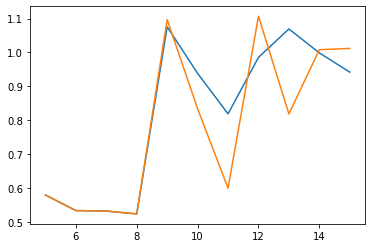

In [7]:
plt.plot(range(5, 16), dx1, label = "LU")
plt.plot(range(5, 16), dx2, label = "LU разложения по схеме частичного выбора")
plt.legend

**Вывод:** в результате проведенных вычислений получилась катострофическая потеря точности. Это связано с тем, что исходная матрица плохо обусловлена. Из графика видно, что при увеличении размерности матрицы получаемая погрешность растет и в итоге полученные значения имеют очень большую погрешность.

## Задача 2 
**Задание:** Дана система уравнений $Ax = b$ порядка n с разреженной матрицей A. Решить систему прямым методом.  
В случае коллизий в матрице диагонали имеют приоритет над столбцами, главные диагонали – над побочными.  
n = 70  
На побочной диагонали элементы равны 50, в 65-ом столбце элементы равны 10. $b_i = i^2 - 100$  
  
1. Для указанной в индивидуальном варианте системы уравнений вывести формулы для нахождения неизвестных.

Исходная система уравнений:
\begin{cases}
10 x_{65} + 50 x_{70} = b_1 \\
10 x_{65} + 50 x_{69} = b_2 \\
... \\
50 x_{65} = b_6 \\
... \\
50 x_2 + 10 x_{65} = b_{69} \\
50 x_1 + 10 x_{65} = b_{70} \\
\end{cases}  
  
Из 6-ой строки: $$x_{65} = {{b_6}\over{50}}$$  
Тогда:  
$$
x_{70} = {{b_1 - 10 x_{65}}\over{50}} \\
x_{69} = {{b_2 - 10 x_{65}}\over{50}} \\
... \\
x_1 =  {{b_{70} - 10 x_{65}}\over{50}} \\
$$

2. Предусмотреть компактное размещение элементов матрицы в памяти ЭВМ, используя одномерные массивы.

In [8]:
second_diag = np.zeros(70)
for i in range(len(second_diag)):
    second_diag[i] = 50
    
column65 = np.zeros(70)
for i in range(len(column65)):
    column65[i] = 10
column65[5] = 50

b = np.zeros(70)
for i in range(len(b)):
    b[i] = ((i + 1)**2) - 100

3. Подготовить тестовый пример.

В качестве тестового примера сделаем аналогичную систему меньшего размера:  
\begin{cases}
 0 x_1 +  0 x_2 +  5 x_3 + 10 x_4 = 15 \\
 0 x_1 +  0 x_2 + 10 x_3 +  0 x_4 = 20 \\
 0 x_1 + 10 x_2 +  5 x_3 +  0 x_4 = 25 \\
10 x_1 +  0 x_2 +  5 x_3 +  0 x_4 = 30 \\
\end{cases}  

In [9]:
second_diag_test = np.zeros(4)
for i in range(len(second_diag_test)):
    second_diag_test[i] = 10
    
column3_test = np.zeros(4)
for i in range(len(column3_test)):
    column3_test[i] = 5
column3_test[1] = 10

b_test = np.zeros(4)
for i in range(len(b_test)):
    b_test[i] = 15 + 5 * i

4. Решить систему для тестового примера и для указанной в варианте системы уравнений.

In [10]:
def Solve(second_diag, column, b, number_column):
    n = len(column) - number_column
    x = np.zeros(len(column), dtype = float)
    p = number_column - 1
    x[p] = b[n] / column[n]
    for i in range(len(column)):   
        if len(column) - 1 - i != p:
            x[len(column) - 1 - i] = (b[i] - column[i] * x[p]) / second_diag[i]
    return x

print(Solve(second_diag_test, column3_test, b_test, 3))
print(Solve(second_diag, column65, b, 65))

[2.  1.5 2.  0.5]
[96.256 93.476 90.736 88.036 85.376 82.756 80.176 77.636 75.136 72.676
 70.256 67.876 65.536 63.236 60.976 58.756 56.576 54.436 52.336 50.276
 48.256 46.276 44.336 42.436 40.576 38.756 36.976 35.236 33.536 31.876
 30.256 28.676 27.136 25.636 24.176 22.756 21.376 20.036 18.736 17.476
 16.256 15.076 13.936 12.836 11.776 10.756  9.776  8.836  7.936  7.076
  6.256  5.476  4.736  4.036  3.376  2.756  2.176  1.636  1.136  0.676
  0.256 -0.124 -0.464 -0.764 -1.28  -1.244 -1.424 -1.564 -1.664 -1.724]


## Задача 3
**Задание:** Решить задачу итерационным методом, указанном в индивидуальном варианте (метод Зейделя). Вектор правой части задается как вектор $b = Ax$, где $x_i = N = 21$.  
Элементы матрицы A задаются формулами: $a_{i,j} = {{cos(i+j)}\over{0.1*\beta}} + 0.1\beta * e^{-(i-j)^2}$, параметр $\beta$ задается формулой: $\beta = (|66 - N| + 5) * m$, здесь N = 21 - номер варианта, m = 18 - размерность матрицы, указанная в варианте. Вектор b задается по вектору решения.

In [11]:
def norm(x):
    max = 0
    for i in range(len(x)):
        if np.abs(x[i]) > max:
            max = np.abs(x[i])
    return max

def matrix_norm(A):
    sum = 0
    max = 0
    for i in range(len(A)):
        for j in range(len(A[i])):
            sum += np.abs(A[i][j])
        if sum > max:
            max = sum
        sum = 0
    return max

def Jacobi(A, b):
    c = np.zeros(m, dtype = float)
    B = np.zeros((m, m), dtype = float)
    B1 = np.zeros((m, m), dtype = float)
    B2 = np.zeros((m, m), dtype = float)
    for i in range(len(A)):
        k = A[i][i]
        c[i] = b[i] / k
        for j in range(i):
            B[i][j] = -A[i][j] / k
            B1[i][j] = B[i][j]
        for j in range(i + 1, len(A[i])):
            B[i][j] = -A[i][j] / k
            B2[i][j] = B[i][j]
    return B, B1, B2, c

def SolveSeidel(B, B2, c):
    x = np.zeros(m, dtype = float)
    xn = np.zeros(m, dtype = float)
    for i in range(m):
        xn[i] = 1

    while norm(xn - x) > (1 - matrix_norm(B)) / matrix_norm(B2) * eps:
        x = xn.copy()
        xn = np.zeros(m, dtype = float)
        for i in range(len(B)):
            for j in range(i + 1):
                xn[i] += B[i][j] * xn[j]
            for j in range(i + 1, len(B[i])):
                xn[i] += B[i][j] * x[j]
            xn[i] += c[i]
    return xn


eps = 10**(-8)
n = 21
m = 18
A = np.zeros((m, m), dtype = float)
beta = (np.abs(66 - n) + 5) * m
for i in range(len(A)):
    for j in range(len(A[i])):
        A[i][j] = np.cos(i + j) / (0.1*beta) + 0.1*beta*np.exp(-((i-j)**2))
b = np.zeros(m, dtype = float)
for i in range(m):
    b[i] = n
b = A.dot(b)

B, B1, B2, c = Jacobi(A, b)
x = SolveSeidel(B, B2, c)
print(x)

[21.         21.         21.00000001 20.99999999 21.         21.
 21.         21.         21.         21.         21.         21.
 21.         21.         21.         21.         21.         21.        ]
